In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('mall_customer.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.drop('CustomerID',axis=1)

In [11]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,Female,23,16,77
75,Male,26,54,54
173,Male,36,87,92
97,Female,27,60,50
90,Female,68,59,55


In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


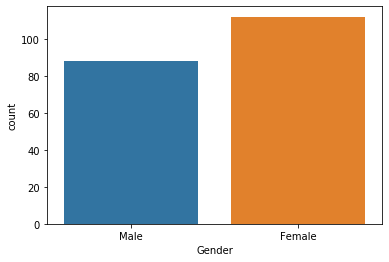

In [13]:
sns.countplot(df.Gender)

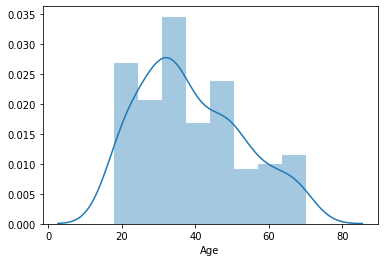

In [14]:
sns.distplot(df.Age)

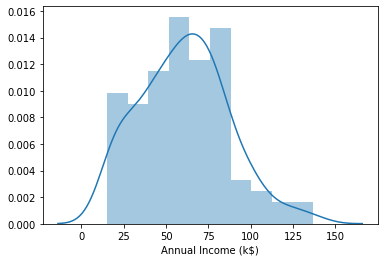

In [15]:
sns.distplot(df["Annual Income (k$)"])

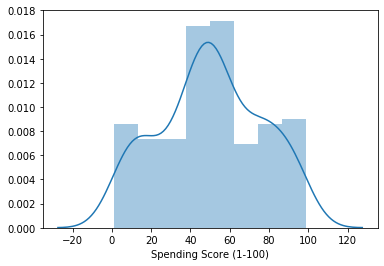

In [16]:
sns.distplot(df['Spending Score (1-100)'])

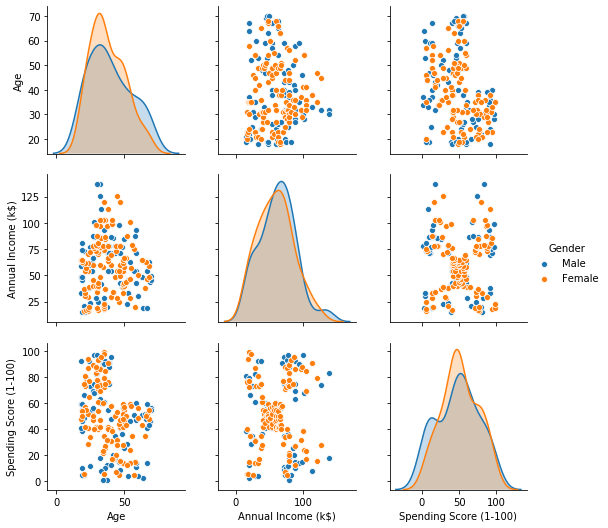

In [17]:
sns.pairplot(df,hue='Gender')

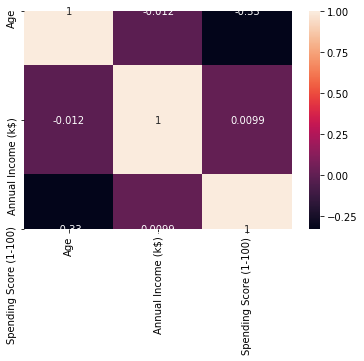

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
x=df.iloc[:,[2,3]].values

Text(0, 0.5, 'WCSS')

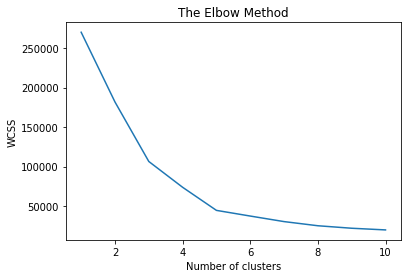

In [20]:
# Using Elbow method for finding optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [21]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

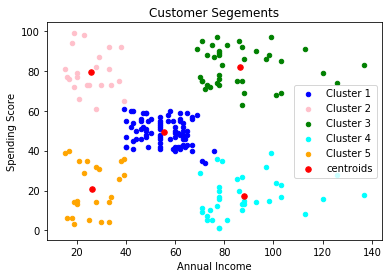

In [22]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
s=20,c='blue',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
s=20,c='pink',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
s=20,c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],
s=20,c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],
s=20,c='orange',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
s=30,c='red',label='centroids')
plt.title('Customer Segements')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()